In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#sns.__version__

In [3]:
nyc = pd.read_excel("nyc_crime_data.xls", header=0)  #manually removed the first 4 rows in the excel file containing metadata

In [4]:
nyc.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [5]:
nyc['pop_sqr'] = nyc.Population**2

In [6]:
nyc['pop_sqr'] = nyc.Population**2
nyc['murder'] = np.where(nyc['Murder and\nnonnegligent\nmanslaughter'] > 0,1,0)
nyc['robbery_cat'] = np.where(nyc.Robbery > 0, 1, 0)

In [7]:
nyc.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,pop_sqr,murder,robbery_cat
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,0,0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,0,0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,1,1
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07,0,1


In [8]:
# Basic data cleaning 
nyc.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,pop_sqr,murder,robbery_cat
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000,3.480000e+02,351.000000,351.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658,2.035547e+11,0.139601,0.595442
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411,3.778876e+12,0.347067,0.491507
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000,9.018117e+06,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000,5.232568e+07,0.000000,1.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000,3.397536e+08,0.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000,7.049493e+13,1.000000,1.000000


In [9]:
# Deleting the rape1 column 

nyc.pop('Rape\n(revised\ndefinition)1')  #because all NaN

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
321   NaN
322   NaN
323   NaN
324   NaN
325   NaN
326   NaN
327   NaN
328   NaN
329   NaN
330   NaN
331   NaN
332   NaN
333   NaN
334   NaN
335   NaN
336   NaN
337   NaN
338   NaN
339   NaN
340   NaN
341   NaN
342   NaN
343   NaN
344   NaN
345   NaN
346   NaN
347   NaN
348   NaN
349   NaN
350   NaN
Name: Rape\n(revised\ndefinition)1, Length: 351, dtype: float64

In [10]:
nyc.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'pop_sqr',
       'murder', 'robbery_cat'],
      dtype='object')

In [11]:
nyc = nyc.rename(index=str, columns={'City': 'city', 'Population': 'population', 'Violent\ncrime': 'violent_crime',
       'Murder and\nnonnegligent\nmanslaughter' : 'murder_slaughter',
       'Rape\n(legacy\ndefinition)2': 'rape',
       'Robbery': 'robbert_default', 'Aggravated\nassault': 'aggr_assault', 
        'Property\ncrime': 'property_crime', 'Burglary':'burglary',
       'Larceny-\ntheft': 'larceny', 'Motor\nvehicle\ntheft': 'motor_theft'})

In [12]:
nyc.head()

,city,population,violent_crime,murder_slaughter,rape,robbert_default,aggr_assault,property_crime,burglary,larceny,motor_theft,Arson3,pop_sqr,murder,robbery_cat
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,0,0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,0,0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,1,1
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07,0,1


In [13]:
nyc.isnull().sum()

city                  0
population            3
violent_crime         3
murder_slaughter      3
rape                  3
robbert_default       3
aggr_assault          3
property_crime        3
burglary              3
larceny               3
motor_theft           3
Arson3              164
pop_sqr               3
murder                0
robbery_cat           0
dtype: int64

In [14]:
nyc[nyc.city.str.contains('The')]
# index 348-350 . # the last three rows

,city,population,violent_crime,murder_slaughter,rape,robbert_default,aggr_assault,property_crime,burglary,larceny,motor_theft,Arson3,pop_sqr,murder,robbery_cat
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [15]:
nyc = nyc[:-3]

In [16]:
print(nyc.isnull().sum())  #nyc.isna().sum()


city                  0
population            0
violent_crime         0
murder_slaughter      0
rape                  0
robbert_default       0
aggr_assault          0
property_crime        0
burglary              0
larceny               0
motor_theft           0
Arson3              161
pop_sqr               0
murder                0
robbery_cat           0
dtype: int64


(0, 500)

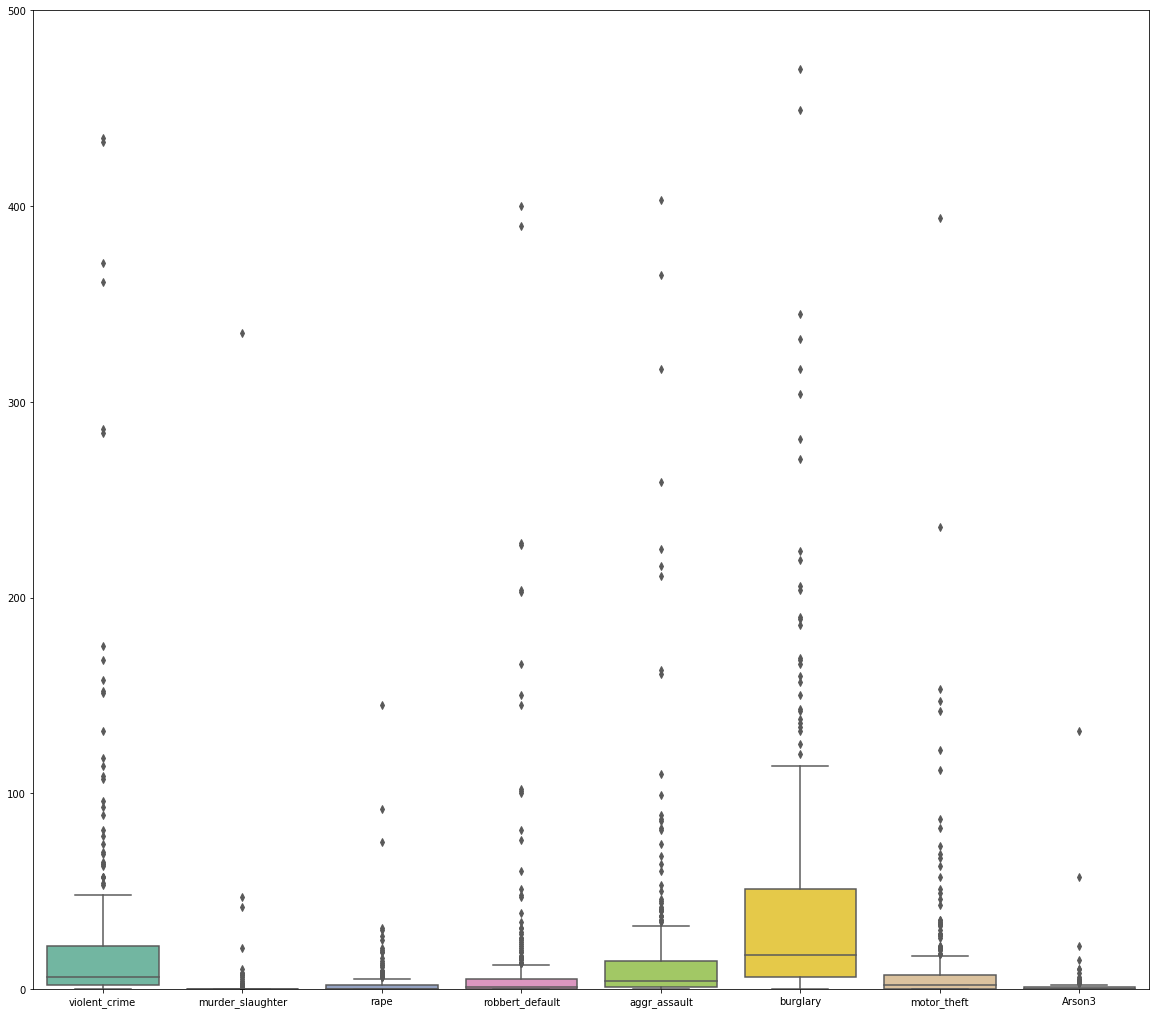

In [17]:
plt.figure(figsize=(20, 18))
sns.boxplot(data=nyc[['violent_crime', 'murder_slaughter', 'rape',
       'robbert_default', 'aggr_assault', 'burglary',
        'motor_theft', 'Arson3']], palette="Set2" )
#plt.ylim(0,5000)  #default shows few (6 in number) outliers after 5000
#plt.ylim(0,1000)  #default shows few outliers after 1000
plt.ylim(0,500)  #almost all values of these variables are concentrated under 500

# Among the variables 'burglary' is the most common 

In [18]:
# creating features - city to boroughs -- didn't find appropriate documentation - http://www.nysl.nysed.gov/genealogy/townlist.htm
#this doesn't have all names. 

In [19]:
nyc.city.duplicated().value_counts()  # no duplicated city names


False    348
Name: city, dtype: int64

In [20]:
nyc.iloc[np.where(nyc.pop_sqr == nyc.pop_sqr.max())]  # looks like NYC is the source for all outliers

,city,population,violent_crime,murder_slaughter,rape,robbert_default,aggr_assault,property_crime,burglary,larceny,motor_theft,Arson3,pop_sqr,murder,robbery_cat
216,New York,8396126.0,52384.0,335.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,NaN,7.049493e+13,1,1


In [21]:
nyc.population.max()

8396126.0

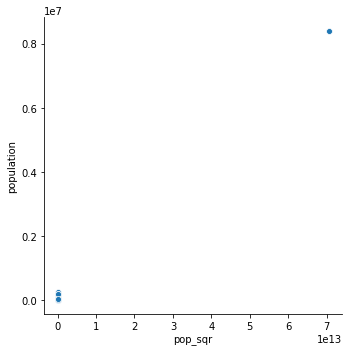

In [22]:
sns.relplot(x='pop_sqr', y='population', data=nyc, kind='scatter')

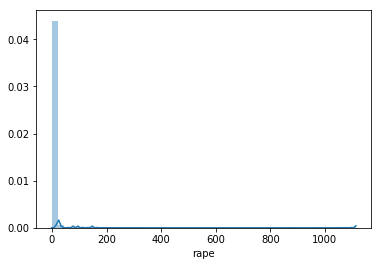

In [23]:
sns.distplot(nyc.rape)

In [24]:
sns.factorplot?

In [25]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
#import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [26]:
nyc[['pop_sqr','murder','robbery_cat']].isnull().sum() 

pop_sqr        0
murder         0
robbery_cat    0
dtype: int64

In [27]:
nyc.loc[np.isnan(nyc['pop_sqr']), 'pop_sqr'] = 0


In [29]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = nyc.population.values.reshape(-1,1)
X = nyc[['robbery_cat', 'pop_sqr', 'murder']]
regr.fit(X, Y)

print('\nCoeffiicients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))



Coeffiicients: 
 [[1.14357771e+04 1.18407197e-07 3.37268835e+04]]

Intercept: 
 [4318.35775066]

R-squared:
0.9975549862941725


In [30]:
regr = linear_model.LinearRegression()
Y = nyc.property_crime.values.reshape(-1,1)
X = nyc[['robbery_cat', 'pop_sqr', 'murder']]
regr.fit(X, Y)

print('\nCoeffiicients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))  # the R^2 is .98. This is probably overfitting. 



Coeffiicients: 
 [[3.00052598e+02 1.99256120e-09 1.18406016e+03]]

Intercept: 
 [40.08610471]

R-squared:
0.9859871204030131


In [49]:
# Data cleaning - population has a large outlier (NY city) and hence pop_sqr also has a large value. 

# Winsorizing the outliers. Outliers in the both ends are substituted with a quantile value given by the function 
# The (limits[0])th lowest values are set to the (limits[0])th percentile, and the (limits[1])th highest values are set to the (limits[1])th percentile. 
from scipy import stats

nyc.population = stats.mstats.winsorize(nyc.population, limits=[0, 0.02])

In [35]:
stats.mstats.winsorize?

In [51]:
print(nyc.population.mean())   # 40037
print(nyc.population.max())   #8396126
nyc.population.quantile(.99)

14925.548850574713
97956.0


97956.0

In [52]:
nyc.population.describe()

count     348.000
mean    14925.549
std     19832.855
min       526.000
25%      3003.000
50%      7233.500
75%     18427.500
max     97956.000
Name: population, dtype: float64

In [53]:
nyc.population.quantile(.98)

96744.34

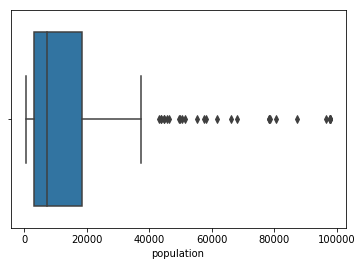

In [54]:

sns.boxplot(nyc.population)


In [55]:
# Version 2 of regression 

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = nyc.population.values.reshape(-1,1)
X = nyc[['robbery_cat', 'pop_sqr', 'murder']]
regr.fit(X, Y)

print('\nCoeffiicients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))



Coeffiicients: 
 [[1.13746078e+04 8.11940666e-10 2.51694022e+04]]

Intercept: 
 [4385.00517745]

R-squared:
0.3984082412702068


In [64]:
# Although the r-squared is not ideal but it's probably more realistic. However, 
# since the population changed, we should also incorporate the same change in pop_sqr
# However, other variables also have a lot of outliers. Let's winsorize everything. 


In [66]:
# Winsorize the X variables to deal with outliers 
#nyc.pop_sqr.describe()
#nyc.pop_sqr.quantile(.97)

nyc.pop_sqr = stats.mstats.winsorize(nyc.pop_sqr, limits=[0,0.02])


In [67]:
nyc.pop_sqr.describe()
nyc.pop_sqr.quantile(.97)

6181152591.609999

In [68]:
regr = linear_model.LinearRegression()
Y = nyc.population.values.reshape(-1,1)
X = nyc[['robbery_cat', 'pop_sqr', 'murder']]
regr.fit(X, Y)

print('\nCoeffiicients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coeffiicients: 
 [[6.63761587e+03 9.89319528e-06 5.36266240e+03]]

Intercept: 
 [4099.92180132]

R-squared:
0.9118084489583235


In [ ]:
# Now the r-squared is .91. 

In [ ]:
# Checking the linear relationship in the variables of interest  

Text(0.5,1,'Robbery')

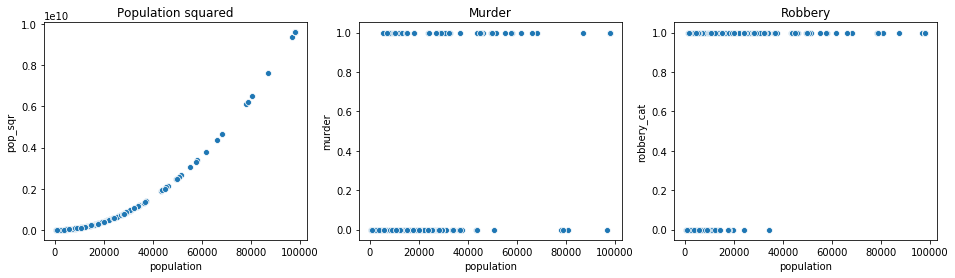

In [96]:
plt.figure(figsize=(16,4))

#Population - population square
plt.subplot(1, 3, 1)
sns.scatterplot(nyc.population, nyc.pop_sqr)
plt.title('Population squared')

# #Population - murder
plt.subplot(1, 3, 2)
sns.scatterplot(nyc.population, nyc.murder)
plt.title('Murder')

# #Population - robbery
plt.subplot(1, 3, 3)
sns.scatterplot(nyc.population, nyc.robbery_cat)
plt.title('Robbery')


# NONE of the relationships are linear 
# For the first pop-pop_squared we can do a square_root 

#follow the following reference 

    

[independent variable transformation](https://statswithcats.wordpress.com/2010/11/21/fifty-ways-to-fix-your-data)

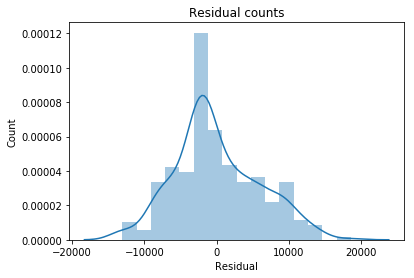

In [101]:
# check residual 

predicted = regr.predict(X).ravel()
actual = nyc.population

residual = actual - predicted

sns.distplot(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# residual is normally distributed. not good - the model is following the errors too closely. 
3

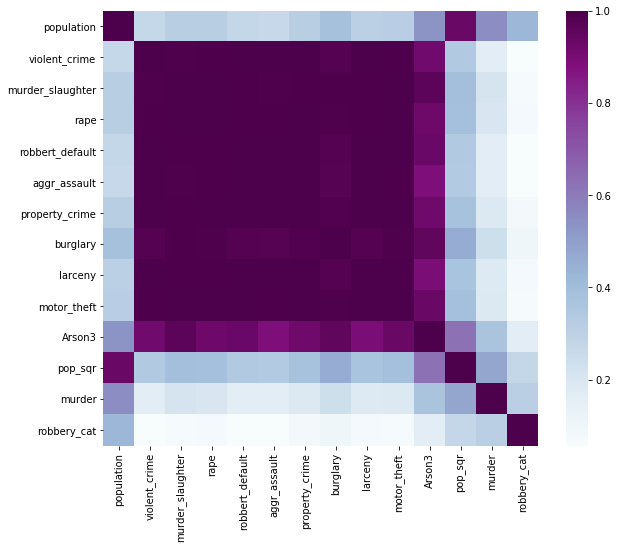

In [104]:
# Check multicollinearity 
plt.figure(figsize=(10,8))
sns.heatmap(nyc.corr(), cmap='BuPu', square=True)


In [ ]:
# There are several highly correlated variables! 
# Need to create different features

In [110]:
# use crossvalidation 

from sklearn.model_selection import cross_val_score

regr = linear_model.LinearRegression()

print(cross_val_score(regr, X, Y, cv=10))

print("Mean CV score: ", (cross_val_score(regr, X, Y, cv=10)).mean())

[0.93184841 0.9352024  0.55260165 0.89086184 0.83290251 0.85809235
 0.90576308 0.93823479 0.90624635 0.91364561]
Mean CV score:  0.8665398985677962


In [107]:
nyc.isna().sum()

city                  0
population            0
violent_crime         0
murder_slaughter      0
rape                  0
robbert_default       0
aggr_assault          0
property_crime        0
burglary              0
larceny               0
motor_theft           0
Arson3              161
pop_sqr               0
murder                0
robbery_cat           0
dtype: int64

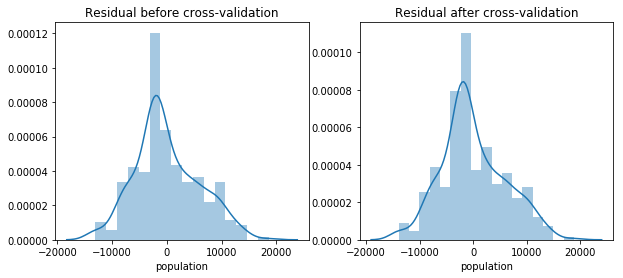

In [118]:
# Now try residual 

from sklearn.model_selection import cross_val_predict
predicted_1 = cross_val_predict(regr, X, Y).ravel()
actual_1 = nyc.population

residual_1 = actual_1 - predicted_1

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.distplot(residual)
plt.title("Residual before cross-validation")

plt.subplot(1,2,2)
sns.distplot(residual_1)
plt.title("Residual after cross-validation")
plt.show()

## Challenge: make your own regression model 


*It's time to make your own regression model. *

*Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.*


In [221]:
nyc = pd.read_excel("nyc_crime_data.xls", header=0)  #manually removed the first 4 rows in the excel file containing metadata

In [222]:
nyc.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [223]:

# data rename 
nyc = nyc.rename(index=str, columns={'City': 'city', 'Population': 'population', 'Violent\ncrime': 'violent_crime',
       'Murder and\nnonnegligent\nmanslaughter' : 'murder_manslaughter',
       'Rape\n(legacy\ndefinition)2': 'rape',
       'Robbery': 'robbery_default', 'Aggravated\nassault': 'aggr_assault', 
        'Property\ncrime': 'property_crime', 'Burglary':'burglary',
       'Larceny-\ntheft': 'larceny_theft', 'Motor\nvehicle\ntheft': 'motor_theft'})

In [224]:
# Creating suggested feaures 

nyc['pop_sqr'] = nyc.population**2
nyc['murder'] = np.where(nyc['murder_manslaughter'] > 0,1,0)
nyc['robbery_cat'] = np.where(nyc.robbery_default > 0, 1, 0)

# Deleting rape 1 column as all nan
nyc = nyc.drop(columns = ['Rape\n(revised\ndefinition)1'])


In [225]:
nyc.columns

Index(['city', 'population', 'violent_crime', 'murder_manslaughter', 'rape',
       'robbery_default', 'aggr_assault', 'property_crime', 'burglary',
       'larceny_theft', 'motor_theft', 'Arson3', 'pop_sqr', 'murder',
       'robbery_cat'],
      dtype='object')

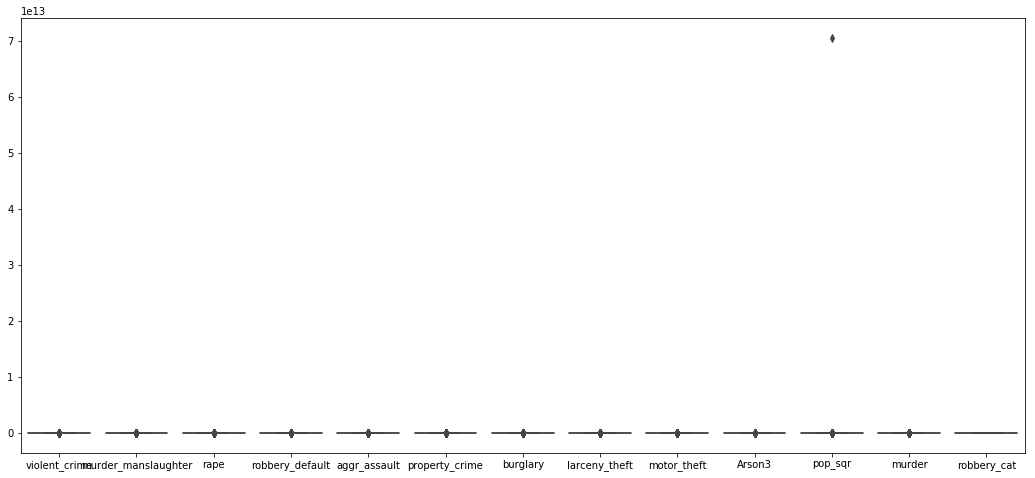

In [227]:
plt.figure(figsize=(18,8))
sns.boxplot(data=nyc[[ 'violent_crime', 'murder_manslaughter', 'rape', 'robbery_default',
       'aggr_assault', 'property_crime', 'burglary', 'larceny_theft',
       'motor_theft', 'Arson3', 'pop_sqr', 'murder', 'robbery_cat']])

# NO data=, only the first variable is returns 

In [183]:
cols = nyc[['violent_crime', 'murder_slaughter', 'rape',
       'robbert_default', 'aggr_assault', 'property_crime', 'burglary',
       'larceny', 'motor_theft', 'Arson3']]

In [188]:
for value in [cols.columns]:
    print(nyc[value].max())

violent_crime       52384.000
murder_slaughter      335.000
rape                 1112.000
robbert_default     19170.000
aggr_assault        31767.000
property_crime     141971.000
burglary            16606.000
larceny            117931.000
motor_theft          7434.000
Arson3                132.000
dtype: float64


In [185]:
# Removing outliers by winorizing 

for value in [cols.columns]:
    print(stats.mstats.winsorize(nyc[value], limits=[0, 0.03]))


Index(['violent_crime', 'murder_slaughter', 'rape', 'robbert_default',
       'aggr_assault', 'property_crime', 'burglary', 'larceny', 'motor_theft',
       'Arson3'],
      dtype='object')
[[ 0.  0.  0. ... 10.  0.  0.]
 [ 3.  0.  0. ... 20.  1.  0.]
 [ 3.  0.  0. ... 15.  0.  0.]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


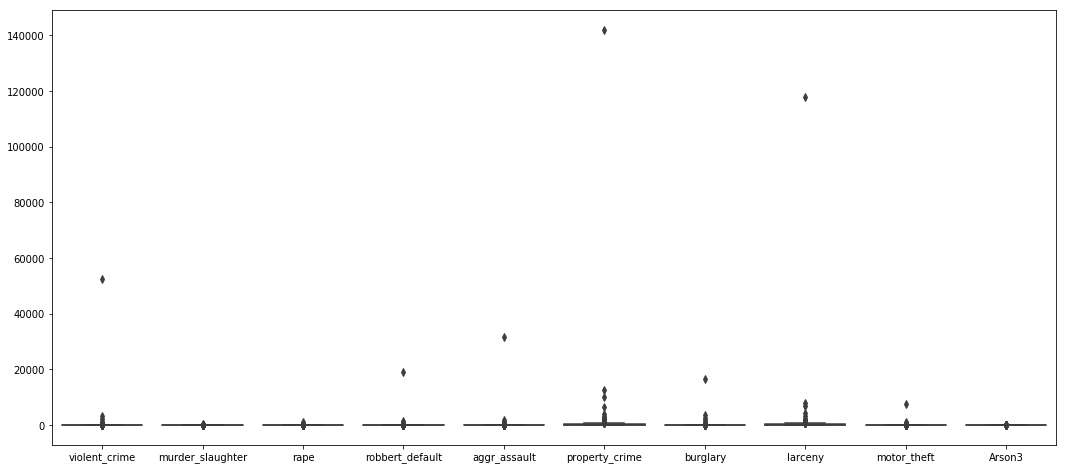

In [186]:


plt.figure(figsize=(18,8))
sns.boxplot(data=cols)


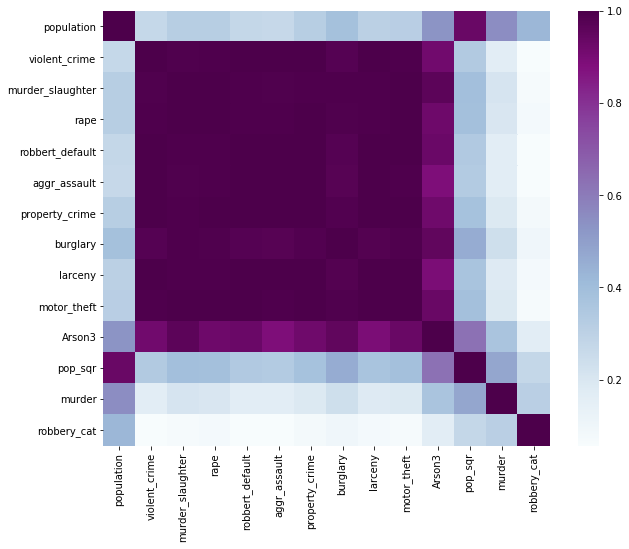

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(nyc.corr(), cmap='BuPu')

### Feature Engineering

The corrplot shows that the original independent variables are highly correlated, and the new features (e.g., the squared population, categorical muder and the categorical robbery) are not correlated with the variable of interest 'property_crime' at all. 


<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 347
Data columns (total 15 columns):
city                348 non-null object
population          348 non-null float64
violent_crime       348 non-null float64
murder_slaughter    348 non-null float64
rape                348 non-null float64
robbert_default     348 non-null float64
aggr_assault        348 non-null float64
property_crime      348 non-null float64
burglary            348 non-null float64
larceny             348 non-null float64
motor_theft         348 non-null float64
Arson3              187 non-null float64
pop_sqr             348 non-null float64
murder              348 non-null int64
robbery_cat         348 non-null int64
dtypes: float64(12), int64(2), object(1)
memory usage: 53.5+ KB


In [ ]:
# Data cleaning - handling all 

# Feature one 



